# Supplementary figure 2: comparison of the different mapping methods. 

In this notebook, we will visually explore the results of the 4 methods that we use to disentangle the spatial organization of cells. 

In [1]:
global_path = './cell-cell-communication/' ## Path to the github downloaded repository

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D


import sys
sys.path.insert(1, global_path + 'Functions/')
from mapping_exploration import prepare_cell2loc_processed, prepare_cytospace, prepare_tangram, histology_figure, abundances_figure, celltrek_figure


plt.rcParams['font.family'] = 'FreeSans' 
title_size = 18
labelout_size = 10
label_size = 8
ticks_size = 6


In [3]:
files = [[global_path + 'Data/Heart/visium-OCT_AVN_lognormalised_A61_ST11.h5ad', 
  global_path + 'Results/Heart/CytoSPACE/AVN/', 
  global_path + 'Results/Heart/Tangram/AVN_ad_map.h5ad', 
  global_path + 'Results/Heart/CellTrek/AVN/meta_celltrek_AVN_A61.csv'], 
  [global_path + 'Data/Heart/visium-OCT_SAN_lognormalised_AH1.h5ad', 
   global_path + 'Results/Heart/CytoSPACE/SAN/',
   global_path + 'Results/Heart/Tangram/SAN_ad_map.h5ad',
   global_path + 'Results/Heart/CellTrek/SAN/meta_celltrek_AH1.csv']]

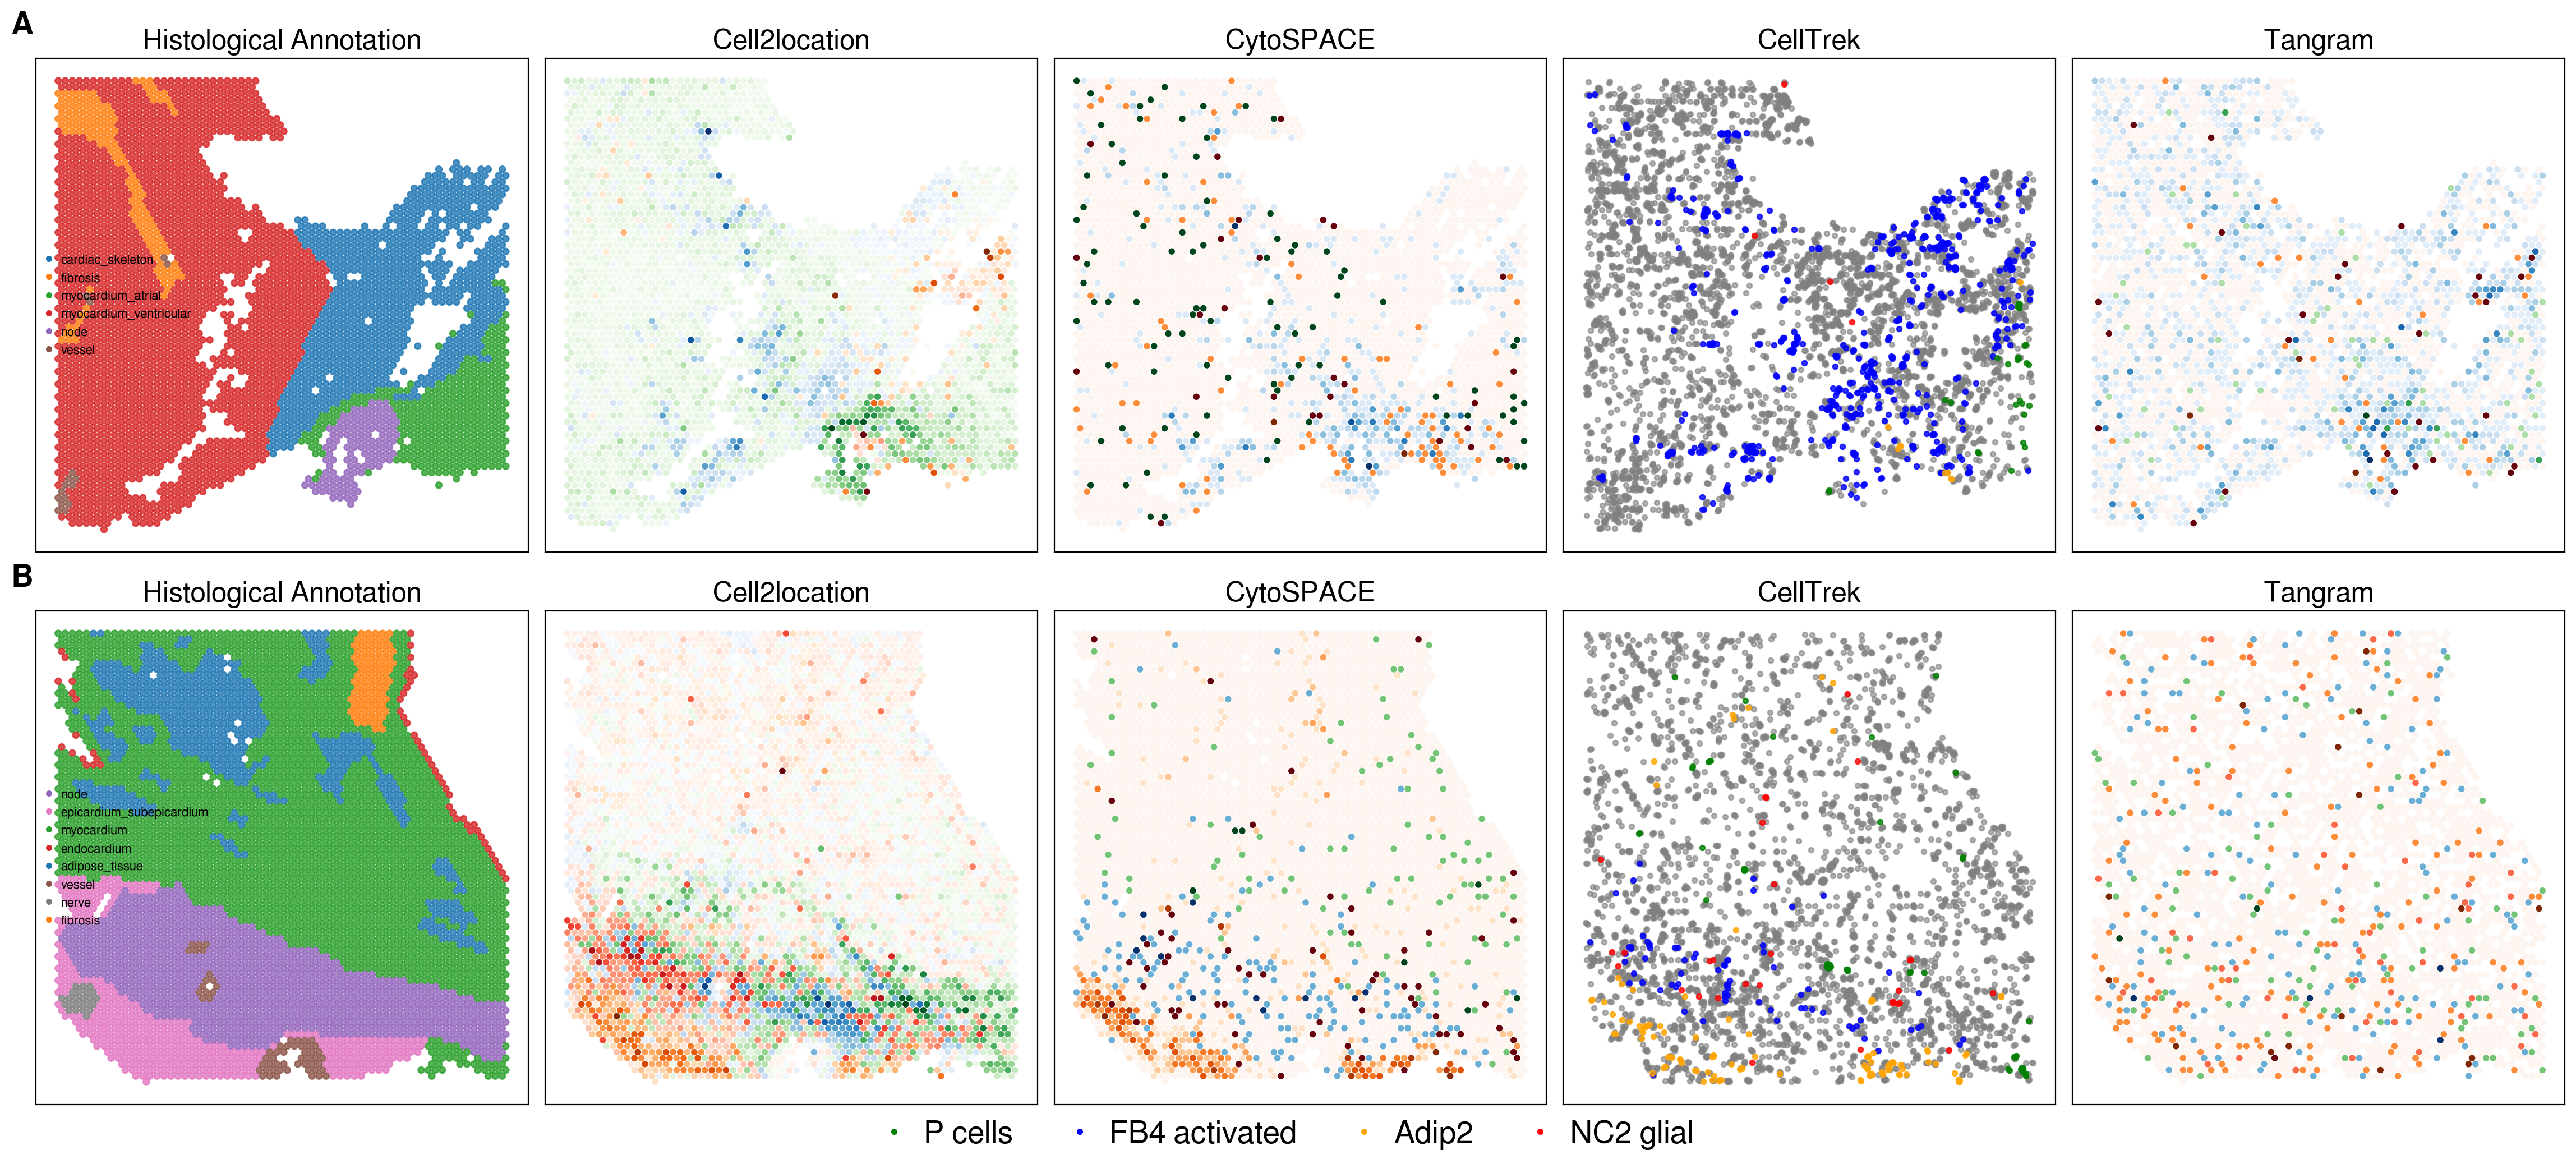

In [6]:
patients = ['AVN', 'SAN']
letter = ['A', 'B']
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(23,10), dpi = 200)

for i, patient in enumerate(patients): 
    if patient == 'AVN':
        cells = ['AVN_P_cell', 'FB4_activated', 'Adip2', 'NC2_glial_NGF+']
    elif patient == 'SAN':
        cells = ['SAN_P_cell', 'FB4_activated', 'Adip2', 'NC2_glial_NGF+']

    array_abundances_c2l, coords_c2l = prepare_cell2loc_processed(files[i][0], cells)
    array_abundances_cyto, coords_cyto = prepare_cytospace(files[i][1], cells)
    array_abundances_tg, coords_tg = prepare_tangram(files[i][2], cells)
    adata_vis, type2color = histology_figure(files[i][0], patient)
    xs = adata_vis.obs.array_row.values
    ys = adata_vis.obs.array_col.values

    axs[i, 0].scatter(ys, -xs, s=15, c= list(adata_vis.obs.color.values), alpha = 0.8)
    axs[i, 0].set_xlabel('')
    axs[i, 0].set_ylabel('')
    axs[i, 0].set_title('Histological Annotation', fontsize = title_size)
    axs[i, 0].tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=region, markersize=5, markerfacecolor=color) for region, color in type2color.items()]
    axs[i, 0].legend(handles=legend_elements, loc='center left', frameon=False, fontsize=label_size, handlelength=0.3)

    abundances_figure(array_abundances_c2l, coords_c2l, axs[i, 1], cells, 'Cell2location')
    abundances_figure(array_abundances_cyto, coords_cyto, axs[i, 2], cells, 'CytoSPACE')
    celltrek_figure(files[i][3], cells, axs[i, 3], cells, 'CellTrek')
    abundances_figure(array_abundances_tg, coords_tg, axs[i, 4], cells, 'Tangram')

    axs[i, 0].text(-0.05, 1.05, letter[i], transform=axs[i, 0].transAxes, size=20, weight='bold')

color_value_dict = {'green': 'P cells', 'blue': 'FB4 activated','orange': 'Adip2','red': 'NC2 glial'}
legend_elements = [Line2D([0], [0], marker='o', color='w', label=color_value_dict[color], markersize=5, markerfacecolor=color) for color in color_value_dict]
plt.tight_layout()
fig.legend(handles=legend_elements, loc='lower center', ncol=len(color_value_dict),  bbox_to_anchor=(0.5, -0.05), frameon=False, fontsize=20, handlelength=0.3)
plt.savefig(global_path+'mapping_results_supplementary_heart.svg',format='svg', dpi=300, bbox_inches='tight')
plt.savefig(global_path+'mapping_results_supplementary_heart.png',format='png', dpi=300, facecolor='white', edgecolor='none', bbox_inches='tight')
